In [311]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.ndimage.interpolation import rotate
from scipy.optimize import curve_fit
%matplotlib inline

# Note: naming convention sucks... left distances correspond to right betas

In [51]:
pos_left = [(517,557), (501,538), (498,530), (466,521), (452, 511)]
pos_right = [(441,496), (431, 490), (417,470), (401,468)]
center = (436,499)
distances_left = []
for position in pos_left:
    dist = np.sqrt((center[0] - position[0])**2 + (center[1] - position[1])**2)/8
    distances_left.append(dist)
distances_right = []
for position in pos_right:
    dist = np.sqrt((center[0] - position[0])**2 + (center[1] - position[1])**2)/8
    distances_right.append(dist)
betas_right = [1.52,1.12,1.16, 1.102,0.93]
betas_left = [0.786, 0.995,0.96,1.24]

<IPython.core.display.Javascript object>


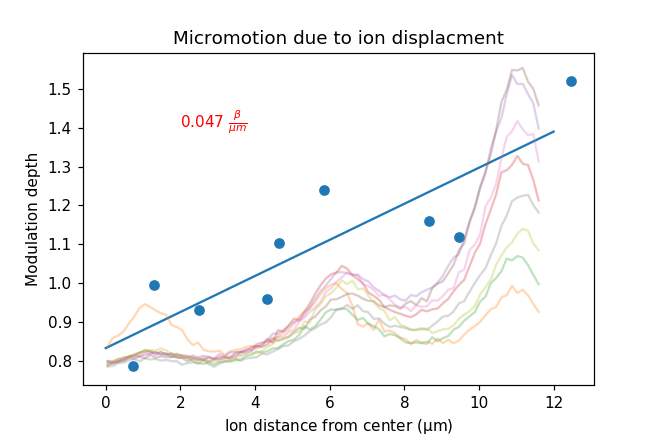

In [270]:
total_d = distances_left + distances_right
total_beta = betas_right + betas_left
x = np.linspace(0,12, 100)
fit = np.polyfit(total_d, total_beta, 1)
plt.scatter(total_d, total_beta)
plt.plot(x, fit[0]*x + fit[1])
scans = [565, 567, 568, 569, 570, 572, 574, 575]
for item in scans:
    data = np.loadtxt('/home/qsimexpcontrol/LabRAD/data/InterleavedLinescan.dir/00' + str(item) + ' - InterleavedLinescan.csv'
                      ,delimiter=',')
    plt.plot(0.1*data[:,0] + 6.0, 0.0001*data[:,1] + 0.7, alpha= 0.3)
plt.text(2, 1.4, r'0.047 $\frac{\beta}{\mu m}$', color='red')
plt.xlabel(r'Ion distance from center ($\mathrm{\mu}$m)')
plt.ylabel('Modulation depth')
plt.title('Micromotion due to ion displacment')
#plt.savefig('/home/qsimexpcontrol/plots/ML_Laser/29MAY2017Modulation_depth_vs_distance.pdf')

# Raw images during ML piezo scan

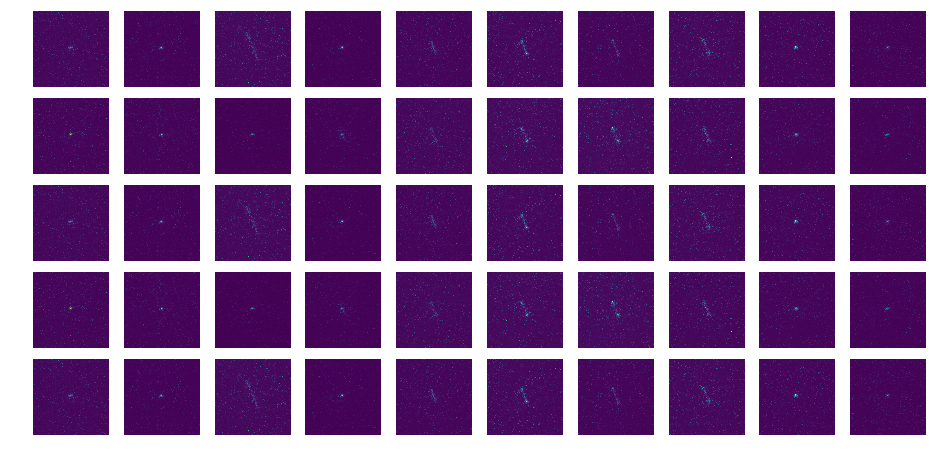

In [197]:
images_503 = np.load('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/00503 - MLpiezoscan.npy')
images_504 = np.load('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/00504 - MLpiezoscan.npy')
images_505 = np.load('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/00503 - MLpiezoscan.npy')
images_506 = np.load('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/00504 - MLpiezoscan.npy')
images_507 = np.load('/home/qsimexpcontrol/LabRAD/data/MLpiezoscan.dir/00503 - MLpiezoscan.npy')
images_list = [images_503, images_504, images_505, images_506, images_507]
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
for i in range(5):
    for j in range(10):
        ax = plt.subplot(10,10,10*i + j +1)
        ax.set_axis_off()
        ax.imshow(images_list[i][j])
    #ax.imshow(images_503[i] + images_504[i] + images_505[i] + images_506[i] + images_507[i])
plt.subplots_adjust(hspace=0.01)
# fig.tight_layout()

# Images with melted ion near resonance

[-0.605      -0.35374378 -0.10248756  0.14876867  0.40002489  0.65128111
  0.90253733  1.15379356  1.40504978  1.656306  ]


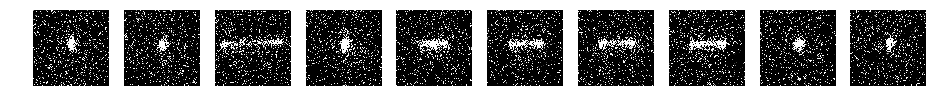

In [308]:
%matplotlib inline(A/(2*np.pi)) * sigma/((x - x0)**2 + (sigma/2)**2)
voltages = np.linspace(2.8,5.061306, 10) - 3.405
print voltages
mod_images_list = [images_503, images_505, images_507]
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
summed = []
for i in range(10):
        ax = plt.subplot(1,10,1 + i)
        ax.set_axis_off()
        rotated = rotate(mod_images_list[0][i] + mod_images_list[1][i] + mod_images_list[2][i], -20)
        cropped = rotated[110:260,110:260] 
        summed.append(np.sum(np.rot90(cropped), axis=0)/3)
        ax.imshow(np.rot90(cropped), clim=[1400, 1600], cmap='gray')

<IPython.core.display.Javascript object>


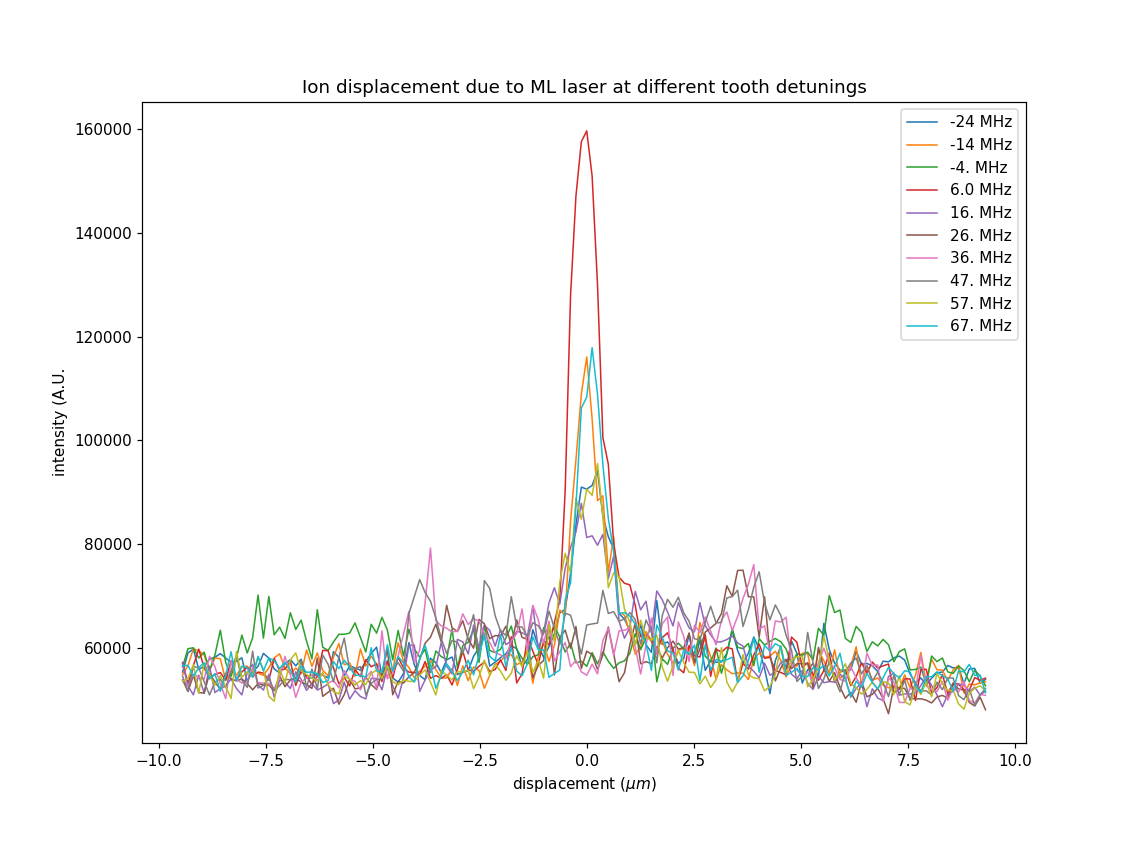

In [309]:
%matplotlib notebook
freq = np.array(voltages)*80/1.9563
x = (np.linspace(110,260, 150))/8
for i, item in enumerate(summed):
    plt.plot(x - 23.2, item, linewidth= 1, label=str(freq[i])[0:3] + ' MHz')
plt.legend()
plt.xlabel(r'displacement ($\mu m$)')
plt.ylabel('intensity (A.U.)')
plt.title('Ion displacement due to ML laser at different tooth detunings')
#plt.savefig('/home/qsimexpcontrol/plots/ML_Laser/29MAY2017phonon_laser_energy.pdf')

# Images with crystallized near resonance

[-0.605      -0.35374378 -0.10248756  0.14876867  0.40002489  0.65128111
  0.90253733  1.15379356  1.40504978  1.656306  ]


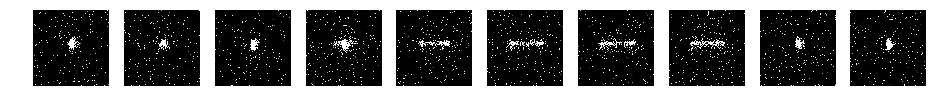

In [398]:
%matplotlib inline
voltages = np.linspace(2.8,5.061306, 10) - 3.405
print voltages
mod_images_list = [images_504, images_506]
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
summed = []
for i in range(10):
        ax = plt.subplot(1,10,1 + i)
        ax.set_axis_off()
        rotated = rotate(mod_images_list[0][i] + mod_images_list[1][i], -20)
        cropped = rotated[110:260,110:260] 
        summed.append(np.sum(np.rot90(cropped), axis=0)/3)
        ax.imshow(np.rot90(cropped), clim=[1400, 1600], cmap='gray')

<IPython.core.display.Javascript object>


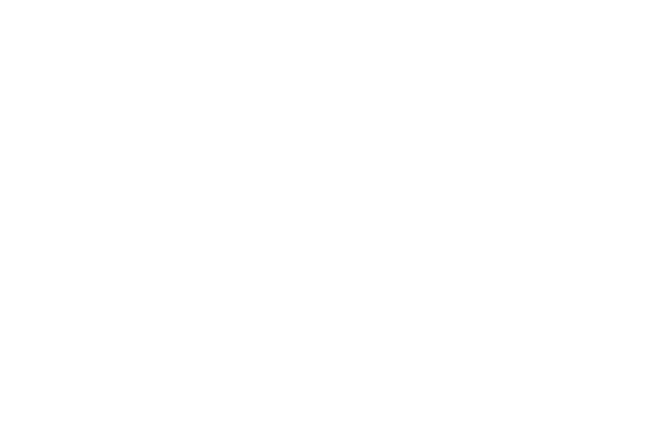

<IPython.core.display.Javascript object>


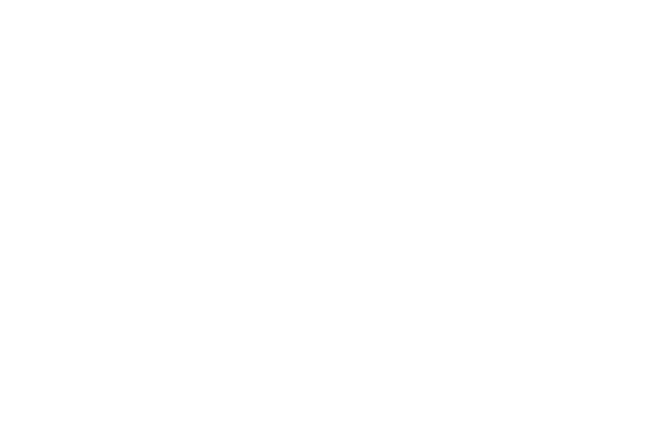

In [404]:
%matplotlib notebook
freq = np.array(voltages)*80/1.9563
x = (np.linspace(110,260, 150))/8
for i, item in enumerate(summed):
    plt.plot(x - 23.2, item, linewidth= 1, label=str(freq[i])[0:3] + ' MHz')
plt.legend()
plt.xlabel(r'displacement ($\mu m$)')
plt.ylabel('intensity (A.U.)')
plt.title('Ion displacement due to ML laser at different tooth detunings')

In [401]:
def gaussianfunc(x, x0, sigma, A, offset):
    return A*np.exp((-0.5*((x - x0)/sigma)**2)) + offset
def oscillator_func(x, x0, A1, A2, offset):
        value = A1*1/(np.sqrt(1-((x-x0)/A2)**2)) + offset
        where_are_NaNs = np.isnan(value)
        value[where_are_NaNs] = offset
        return value

0.428337919396


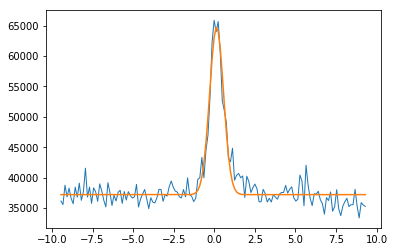

0.378893766364


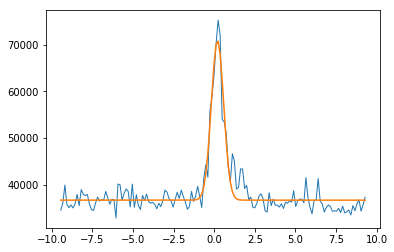

0.325026907356


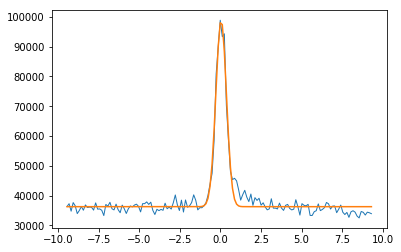

0.37538027919


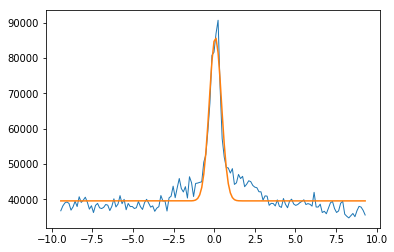

4.15261687382


/home/qsimexpcontrol/.virtualenvs/labrad/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


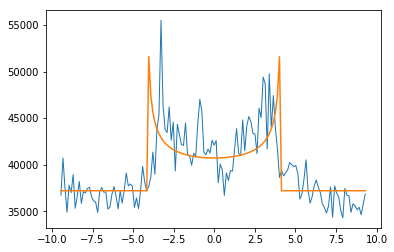

4.14742649344


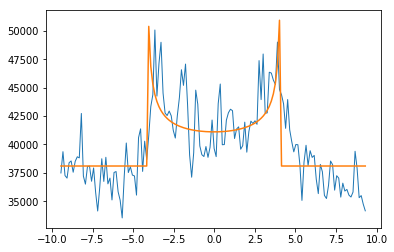

4.13538415215


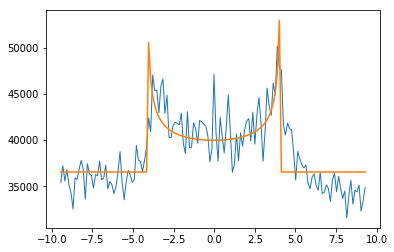

4.20854001049


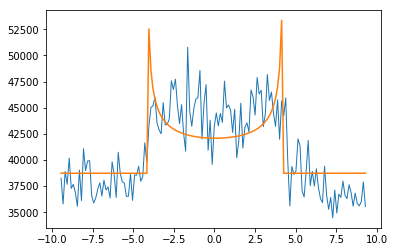

0.367478504532


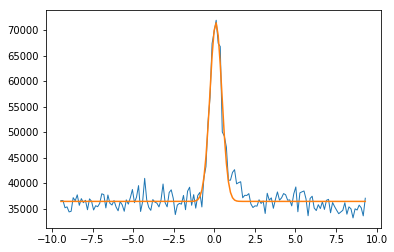

0.284860583858


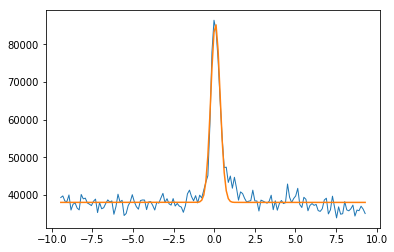

In [382]:
%matplotlib inline
for i, item in enumerate(summed):
    if i in [0,1,2, 3,8,9]:
        plt.plot(x - 23.2, item, linewidth= 1, label=str(freq[i])[0:3] + ' MHz')
        gaussfit1, pcov1 = curve_fit(gaussianfunc, x - 23.2, item, p0=[0.0,3.0, 70000, 50000])
        plt.plot(x-23.2, gaussianfunc(x-23.2, gaussfit1[0], gaussfit1[1], gaussfit1[2], gaussfit1[3]))
        print gaussfit1[1]
#    elif i == 2:
#        plt.plot(x - 23.2, item, linewidth= 1, label=str(freq[i])[0:3] + ' MHz')
#        oscfit, pcov1 = curve_fit(oscillator_func, x-23.2, item, p0=[0.0,10000,6.0,53000])
#        plt.plot(x-23.2, oscillator_func(x-23.2, oscfit[0], oscfit[1], oscfit[2], oscfit[3]))
#        print oscfit[2]
    else:
        plt.plot(x - 23.2, item, linewidth= 1, label=str(freq[i])[0:3] + ' MHz')
        oscfit, pcov1 = curve_fit(oscillator_func, x-23.2, item, p0=[0.0,10000,4.0,53000])
        plt.plot(x-23.2, oscillator_func(x-23.2, oscfit[0], oscfit[1], oscfit[2], oscfit[3]))
        print oscfit[2]
    plt.show()

In [393]:
mean_dist = [0.428, 0.379, 0.325, 0.375, 4.15, 4.14, 4.13, 4.21, 0.367, 0.285]
vel = 2*np.pi*500e3*np.array(mean_dist)*1e-6

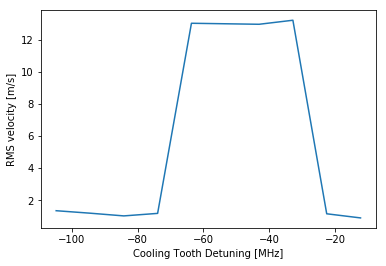

In [397]:
plt.plot(freq - 80, vel)
plt.ylabel('RMS velocity [m/s]')
plt.xlabel('Cooling Tooth Detuning [MHz]')
plt.savefig('/home/qsimexpcontrol/plots/ML_Laser/30MAY2017detuning_vs_rms_velocity.pdf')